# Landfall rainfall

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [80]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from src.datasources import codab
from src.constants import *
from src import db_utils

In [31]:
load_path = (
    Path(AA_DATA_DIR)
    / "public"
    / "processed"
    / "moz"
    / "landfall_time_location_fixed_adm1_v7.csv"
)
landfall_df = pd.read_csv(load_path)

In [32]:
[x for x in landfall_df.columns]

['ISO_TIME',
 'SID',
 'SEASON',
 'NUMBER',
 'BASIN',
 'SUBBASIN',
 'NAME',
 'NATURE',
 'LAT',
 'LON',
 'WMO_WIND',
 'WMO_PRES',
 'WMO_AGENCY',
 'TRACK_TYPE',
 'DIST2LAND',
 'LANDFALL',
 'IFLAG',
 'USA_AGENCY',
 'USA_ATCFID',
 'USA_LAT',
 'USA_LON',
 'USA_RECORD',
 'USA_STATUS',
 'USA_WIND',
 'USA_PRES',
 'USA_SSHS',
 'USA_R34_NE',
 'USA_R34_SE',
 'USA_R34_SW',
 'USA_R34_NW',
 'USA_R50_NE',
 'USA_R50_SE',
 'USA_R50_SW',
 'USA_R50_NW',
 'USA_R64_NE',
 'USA_R64_SE',
 'USA_R64_SW',
 'USA_R64_NW',
 'USA_POCI',
 'USA_ROCI',
 'USA_RMW',
 'USA_EYE',
 'TOK_LAT',
 'TOK_LON',
 'TOK_GRADE',
 'TOK_WIND',
 'TOK_PRES',
 'TOK_R50_DR',
 'TOK_R50_L',
 'TOK_R50_S',
 'TOK_R30_DR',
 'TOK_R30_L',
 'TOK_R30_S',
 'TOK_LAND',
 'CMA_LAT',
 'CMA_LON',
 'CMA_CAT',
 'CMA_WIND',
 'CMA_PRES',
 'HKO_LAT',
 'HKO_LON',
 'HKO_CAT',
 'HKO_WIND',
 'HKO_PRES',
 'KMA_LAT',
 'KMA_LON',
 'KMA_CAT',
 'KMA_WIND',
 'KMA_PRES',
 'KMA_R50_DR',
 'KMA_R50_L',
 'KMA_R50_S',
 'KMA_R30_DR',
 'KMA_R30_L',
 'KMA_R30_S',
 'NEW_LAT',
 'NEW

In [35]:
cols = [
    "SID",
    "SEASON",
    "NAME",
    "USA_WIND",
    "LAT",
    "LON",
    "year",
    "month",
    "day",
]

In [36]:
landfall_df = landfall_df[cols]

In [38]:
date_cols = ["year", "month", "day"]
landfall_df[date_cols] = landfall_df[date_cols].astype(int)

In [39]:
landfall_df

,SID,SEASON,NAME,USA_WIND,LAT,LON,year,month,day
0,1999357S08076,2000,ASTRIDE,25.000000,-13.633333,40.466667,2000,1,3
1,2000032S11116,2000,ELINE:LEONE,109.000000,-20.550000,34.750000,2000,2,22
2,2000058S14063,2000,GLORIA,25.000000,-23.983333,35.433333,2000,3,9
3,2000083S17102,2000,HUDAH,80.000000,-17.200000,38.300000,2000,4,8
4,2002364S16045,2003,DELFINA,52.500000,-15.983333,40.066667,2002,10,26
5,2003056S21042,2003,JAPHET,86.500000,-21.800000,35.250000,2003,3,2
6,2007043S11071,2007,FAVIO,93.333333,-21.900000,35.300000,2007,2,22
7,2008062S10064,2008,JOKWE,94.166667,-15.983333,40.133333,2008,3,8
8,2009082S16039,2009,IZILDA,15.000000,-20.200000,34.700000,2009,3,29
9,2012010S24049,2012,DANDO,NaN,-24.800000,34.500000,2012,1,16


In [117]:
landfall_df["USA_WIND"] = landfall_df["USA_WIND"].abs()

In [118]:
landfall_df

,SID,SEASON,NAME,USA_WIND,LAT,LON,year,month,day,landfall_date
0,1999357S08076,2000,ASTRIDE,25.000000,-13.633333,40.466667,2000,1,3,2000-01-03
1,2000032S11116,2000,ELINE:LEONE,109.000000,-20.550000,34.750000,2000,2,22,2000-02-22
2,2000058S14063,2000,GLORIA,25.000000,-23.983333,35.433333,2000,3,9,2000-03-09
3,2000083S17102,2000,HUDAH,80.000000,-17.200000,38.300000,2000,4,8,2000-04-08
4,2002364S16045,2003,DELFINA,52.500000,-15.983333,40.066667,2002,10,26,2002-10-26
5,2003056S21042,2003,JAPHET,86.500000,-21.800000,35.250000,2003,3,2,2003-03-02
6,2007043S11071,2007,FAVIO,93.333333,-21.900000,35.300000,2007,2,22,2007-02-22
7,2008062S10064,2008,JOKWE,94.166667,-15.983333,40.133333,2008,3,8,2008-03-08
8,2009082S16039,2009,IZILDA,15.000000,-20.200000,34.700000,2009,3,29,2009-03-29
9,2012010S24049,2012,DANDO,NaN,-24.800000,34.500000,2012,1,16,2012-01-16


In [41]:
landfall_df["landfall_date"] = pd.to_datetime(
    landfall_df[["year", "month", "day"]]
)

In [42]:
landfall_df

,SID,SEASON,NAME,USA_WIND,LAT,LON,year,month,day,landfall_date
0,1999357S08076,2000,ASTRIDE,25.000000,-13.633333,40.466667,2000,1,3,2000-01-03
1,2000032S11116,2000,ELINE:LEONE,109.000000,-20.550000,34.750000,2000,2,22,2000-02-22
2,2000058S14063,2000,GLORIA,25.000000,-23.983333,35.433333,2000,3,9,2000-03-09
3,2000083S17102,2000,HUDAH,80.000000,-17.200000,38.300000,2000,4,8,2000-04-08
4,2002364S16045,2003,DELFINA,52.500000,-15.983333,40.066667,2002,10,26,2002-10-26
5,2003056S21042,2003,JAPHET,86.500000,-21.800000,35.250000,2003,3,2,2003-03-02
6,2007043S11071,2007,FAVIO,93.333333,-21.900000,35.300000,2007,2,22,2007-02-22
7,2008062S10064,2008,JOKWE,94.166667,-15.983333,40.133333,2008,3,8,2008-03-08
8,2009082S16039,2009,IZILDA,15.000000,-20.200000,34.700000,2009,3,29,2009-03-29
9,2012010S24049,2012,DANDO,NaN,-24.800000,34.500000,2012,1,16,2012-01-16


In [6]:
adm1 = codab.load_codab(aoi_only=True)

<Axes: >

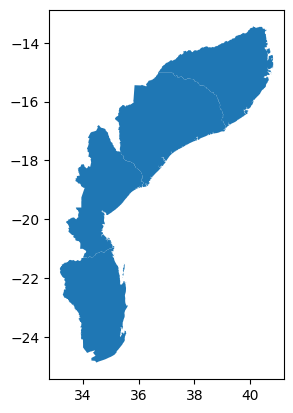

In [7]:
adm1.plot()

In [43]:
aoi_adm1_pcodes = adm1["ADM1_PCODE"].unique()

In [52]:
aoi_pcodes_query_str = ", ".join([f"'{p}'" for p in aoi_adm1_pcodes])

In [67]:
IMERG_START_DATE = pd.to_datetime("2000-06-01")
extra_days = 1
dfs = []
for sid, row in landfall_df.set_index("SID").iterrows():
    landfall_date = row["landfall_date"]
    start_date = landfall_date - pd.Timedelta(days=extra_days)
    end_date = landfall_date + pd.Timedelta(days=extra_days)
    if end_date < IMERG_START_DATE:
        print(f"{row['NAME']} too early")
        continue
    query = f"""
    SELECT *
    FROM public.imerg
    WHERE
        valid_date BETWEEN '{start_date.date()}' AND '{end_date.date()}'
        AND pcode IN ({aoi_pcodes_query_str})
    """
    df_in = pd.read_sql(query, con=db_utils.get_engine(stage="prod"))
    df_in["SID"] = sid
    dfs.append(df_in)

ASTRIDE too early
ELINE:LEONE too early
GLORIA too early
HUDAH too early


In [68]:
imerg_df = pd.concat(dfs, ignore_index=True)

In [71]:
imerg_df

,iso3,pcode,valid_date,adm_level,mean,median,min,max,count,sum,std,SID
0,MOZ,MZ03,2002-10-25,1,0.070872,0.000000,0.0,6.180000,2409,170.7300,0.287933,2002364S16045
1,MOZ,MZ03,2002-10-26,1,0.000434,0.000000,0.0,0.125000,2409,1.0450,0.005306,2002364S16045
2,MOZ,MZ03,2002-10-27,1,0.001399,0.000000,0.0,0.505000,2409,3.3700,0.018577,2002364S16045
3,MOZ,MZ07,2002-10-25,1,5.348575,3.250000,0.0,35.425003,2603,13922.3400,6.295778,2002364S16045
4,MOZ,MZ07,2002-10-26,1,0.473849,0.000000,0.0,22.735000,2603,1233.4299,1.644792,2002364S16045
...,...,...,...,...,...,...,...,...,...,...,...,...
271,MOZ,MZ09,2024-03-12,1,24.026690,10.934999,0.0,199.310000,2317,55669.8400,30.353436,2024071S20039
272,MOZ,MZ09,2024-03-13,1,9.223557,1.570000,0.0,114.500000,2317,21370.9790,16.398250,2024071S20039
273,MOZ,MZ11,2024-03-11,1,6.263532,1.110000,0.0,113.134995,3460,21671.8200,12.329615,2024071S20039
274,MOZ,MZ11,2024-03-12,1,4.774464,1.932500,0.0,42.820000,3460,16519.6450,6.716722,2024071S20039


In [75]:
imerg_sum_df = imerg_df.groupby(["pcode", "SID"])["mean"].sum().reset_index()
imerg_sum_df = imerg_sum_df.rename(columns={"mean": "sum_mean_rain"})
imerg_sum_df

,pcode,SID,sum_mean_rain
0,MZ03,2002364S16045,0.072704
1,MZ03,2003056S21042,120.842538
2,MZ03,2007043S11071,53.513980
3,MZ03,2008062S10064,5.705008
4,MZ03,2009082S16039,16.703456
...,...,...,...
83,MZ11,2022020S13059,172.006284
84,MZ11,2022065S16055,113.405056
85,MZ11,2022110S12051,17.506361
86,MZ11,2023061S22036,191.066692


In [120]:
combined_df = landfall_df.merge(imerg_sum_df).merge(
    adm1.rename(columns={"ADM1_PCODE": "pcode"})[["pcode", "ADM1_PT"]]
)
combined_df["nameseason"] = (
    combined_df["NAME"].str.capitalize()
    + " "
    + combined_df["year"].astype(str)
)
combined_df

,SID,SEASON,NAME,USA_WIND,LAT,LON,year,month,day,landfall_date,pcode,sum_mean_rain,ADM1_PT,nameseason
0,2002364S16045,2003,DELFINA,52.500000,-15.983333,40.066667,2002,10,26,2002-10-26,MZ03,0.072704,Inhambane,Delfina 2002
1,2002364S16045,2003,DELFINA,52.500000,-15.983333,40.066667,2002,10,26,2002-10-26,MZ07,5.913417,Nampula,Delfina 2002
2,2002364S16045,2003,DELFINA,52.500000,-15.983333,40.066667,2002,10,26,2002-10-26,MZ09,6.525196,Sofala,Delfina 2002
3,2002364S16045,2003,DELFINA,52.500000,-15.983333,40.066667,2002,10,26,2002-10-26,MZ11,23.723759,Zambezia,Delfina 2002
4,2003056S21042,2003,JAPHET,86.500000,-21.800000,35.250000,2003,3,2,2003-03-02,MZ03,120.842538,Inhambane,Japhet 2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2023061S22036,2023,FREDDY,89.333333,-17.816667,37.116667,2023,3,11,2023-03-11,MZ11,191.066692,Zambezia,Freddy 2023
88,2024071S20039,2024,FILIPO,51.666667,-21.333333,35.033333,2024,3,12,2024-03-12,MZ03,96.246190,Inhambane,Filipo 2024
89,2024071S20039,2024,FILIPO,51.666667,-21.333333,35.033333,2024,3,12,2024-03-12,MZ07,6.874249,Nampula,Filipo 2024
90,2024071S20039,2024,FILIPO,51.666667,-21.333333,35.033333,2024,3,12,2024-03-12,MZ09,64.193284,Sofala,Filipo 2024


In [121]:
total_seasons = combined_df["SEASON"].nunique() - 1

In [122]:
def calculate_rp(group, col_name, total_seasons):
    group["rank"] = group[col_name].rank(ascending=False)
    group["rp"] = (total_seasons + 1) / group["rank"]
    return group

In [123]:
combined_df = (
    combined_df.groupby("pcode")
    .apply(
        calculate_rp,
        col_name="sum_mean_rain",
        total_seasons=total_seasons,
        include_groups=False,
    )
    .reset_index()
    .drop(columns="level_1")
)

In [124]:
combined_df

,pcode,SID,SEASON,NAME,USA_WIND,LAT,LON,year,month,day,landfall_date,sum_mean_rain,ADM1_PT,nameseason,rank,rp
0,MZ03,2002364S16045,2003,DELFINA,52.500000,-15.983333,40.066667,2002,10,26,2002-10-26,0.072704,Inhambane,Delfina 2002,22.0,0.590909
1,MZ03,2003056S21042,2003,JAPHET,86.500000,-21.800000,35.250000,2003,3,2,2003-03-02,120.842538,Inhambane,Japhet 2003,1.0,13.000000
2,MZ03,2007043S11071,2007,FAVIO,93.333333,-21.900000,35.300000,2007,2,22,2007-02-22,53.513980,Inhambane,Favio 2007,6.0,2.166667
3,MZ03,2008062S10064,2008,JOKWE,94.166667,-15.983333,40.133333,2008,3,8,2008-03-08,5.705008,Inhambane,Jokwe 2008,15.0,0.866667
4,MZ03,2009082S16039,2009,IZILDA,15.000000,-20.200000,34.700000,2009,3,29,2009-03-29,16.703456,Inhambane,Izilda 2009,11.0,1.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,MZ11,2022020S13059,2022,ANA,48.666667,-16.266667,39.766667,2022,1,24,2022-01-24,172.006284,Zambezia,Ana 2022,2.0,6.500000
88,MZ11,2022065S16055,2022,GOMBE,98.333333,-15.466667,40.566667,2022,3,11,2022-03-11,113.405056,Zambezia,Gombe 2022,5.0,2.600000
89,MZ11,2022110S12051,2022,JASMINE,35.000000,-15.250000,40.650000,2022,4,23,2022-04-23,17.506361,Zambezia,Jasmine 2022,16.0,0.812500
90,MZ11,2023061S22036,2023,FREDDY,89.333333,-17.816667,37.116667,2023,3,11,2023-03-11,191.066692,Zambezia,Freddy 2023,1.0,13.000000


In [125]:
dff.sort_values("rank")

,pcode,SID,SEASON,NAME,USA_WIND,LAT,LON,year,month,day,landfall_date,sum_mean_rain,ADM1_PT,nameseason,rank,rp
90,MZ11,2023061S22036,2023,FREDDY,89.333333,-17.816667,37.116667,2023,3,11,2023-03-11,191.066692,Zambezia,Freddy 2023,1.0,13.000000
87,MZ11,2022020S13059,2022,ANA,48.666667,-16.266667,39.766667,2022,1,24,2022-01-24,172.006284,Zambezia,Ana 2022,2.0,6.500000
82,MZ11,2019063S18038,2019,IDAI,100.000000,-19.750000,35.000000,2019,3,14,2019-03-14,155.127643,Zambezia,Idai 2019,3.5,3.714286
81,MZ11,2019063S18038,2019,IDAI,25.000000,-17.666667,37.300000,2019,3,4,2019-03-04,155.127643,Zambezia,Idai 2019,3.5,3.714286
88,MZ11,2022065S16055,2022,GOMBE,98.333333,-15.466667,40.566667,2022,3,11,2022-03-11,113.405056,Zambezia,Gombe 2022,5.0,2.600000
76,MZ11,2013046S20042,2013,HARUNA,25.000000,-17.300000,37.900000,2013,2,16,2013-02-16,53.322924,Zambezia,Haruna 2013,6.0,2.166667
85,MZ11,2021012S12086,2021,ELOISE,85.333333,-20.233333,34.666667,2021,1,23,2021-01-23,51.820241,Zambezia,Eloise 2021,7.0,1.857143
72,MZ11,2008062S10064,2008,JOKWE,94.166667,-15.983333,40.133333,2008,3,8,2008-03-08,47.309906,Zambezia,Jokwe 2008,8.0,1.625000
80,MZ11,2019018S24033,2019,DESMOND,27.500000,-18.716667,36.250000,2019,1,21,2019-01-21,26.571674,Zambezia,Desmond 2019,9.0,1.444444
84,MZ11,2020355S11065,2021,CHALANE,64.000000,-19.250000,35.550000,2020,12,30,2020-12-30,26.128232,Zambezia,Chalane 2020,10.0,1.300000


Inhambane
Nampula
Sofala
Zambezia


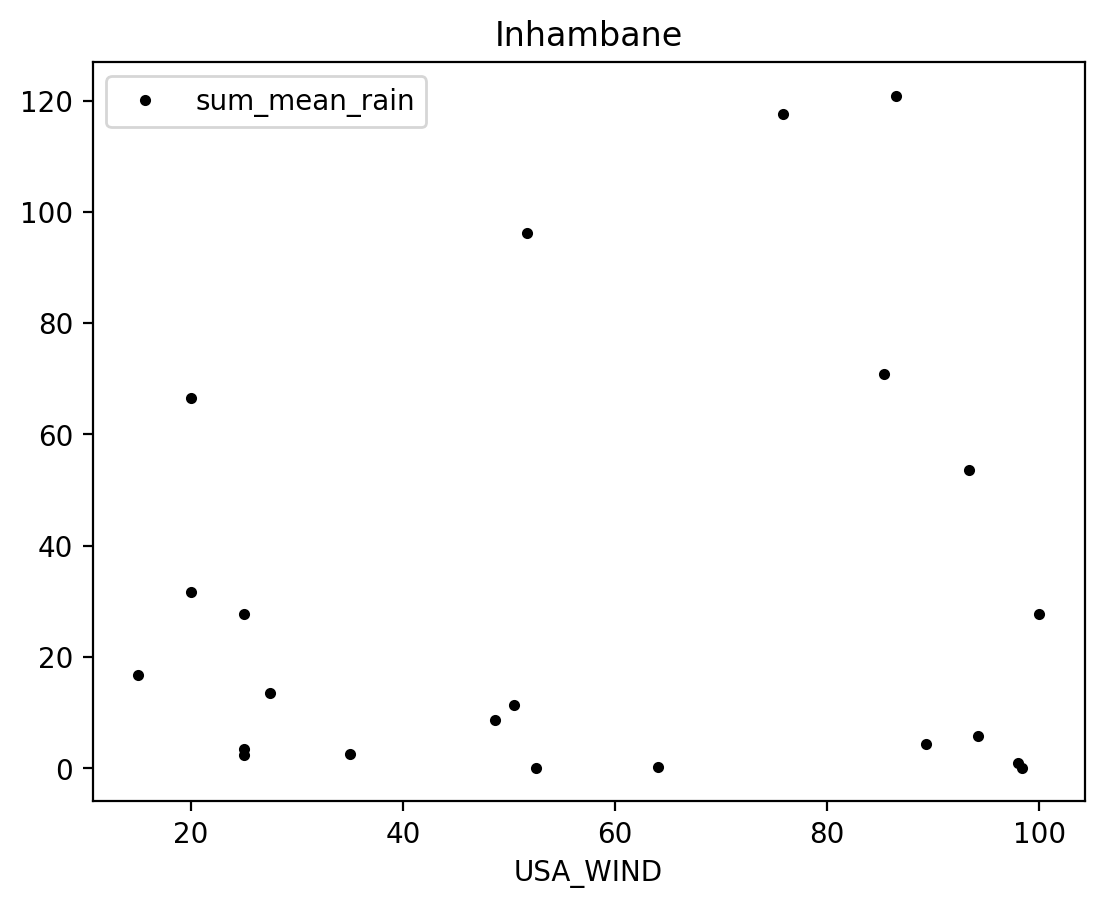

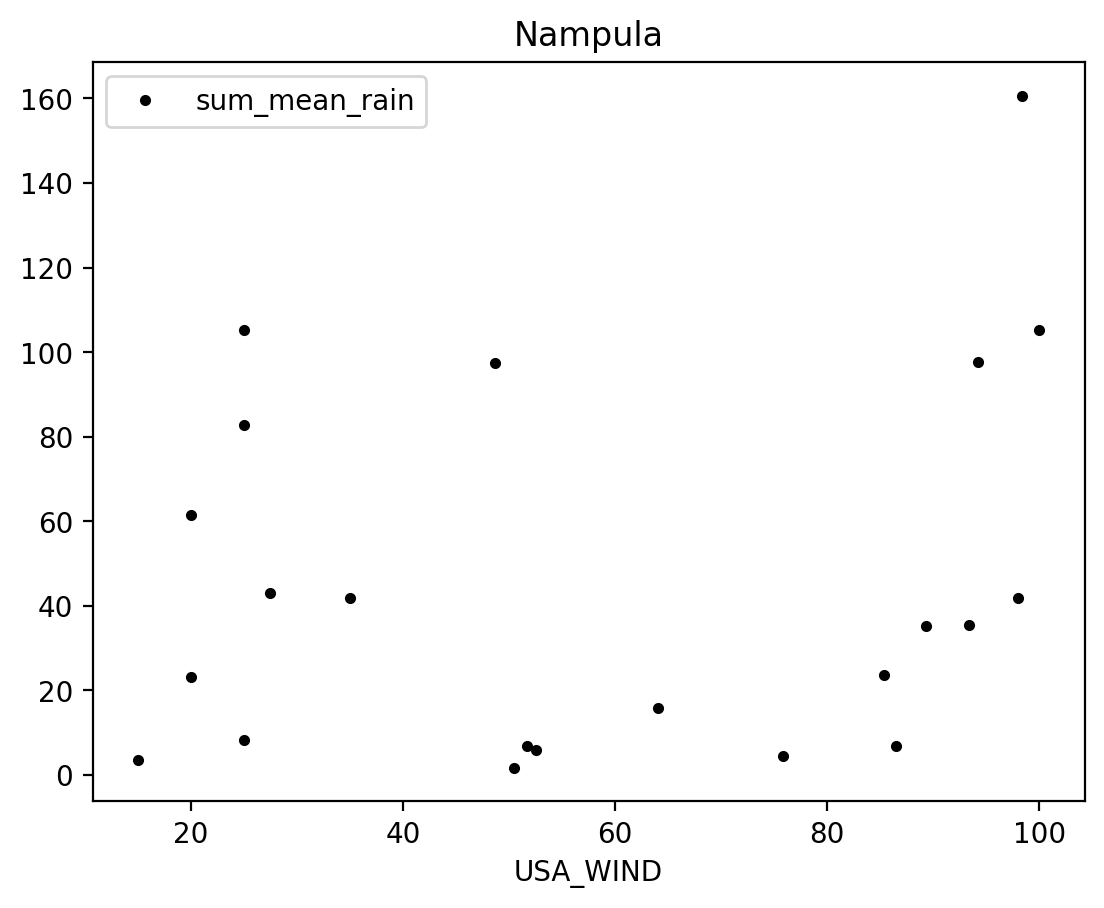

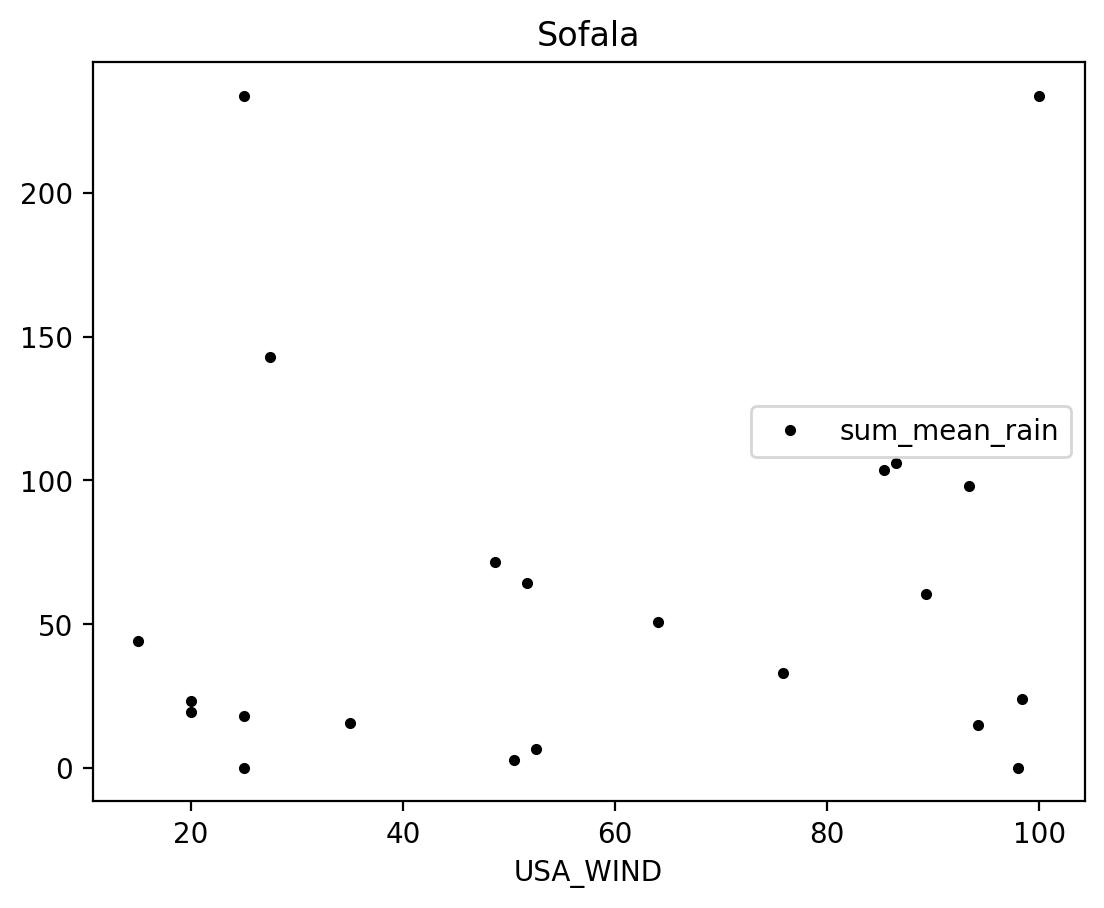

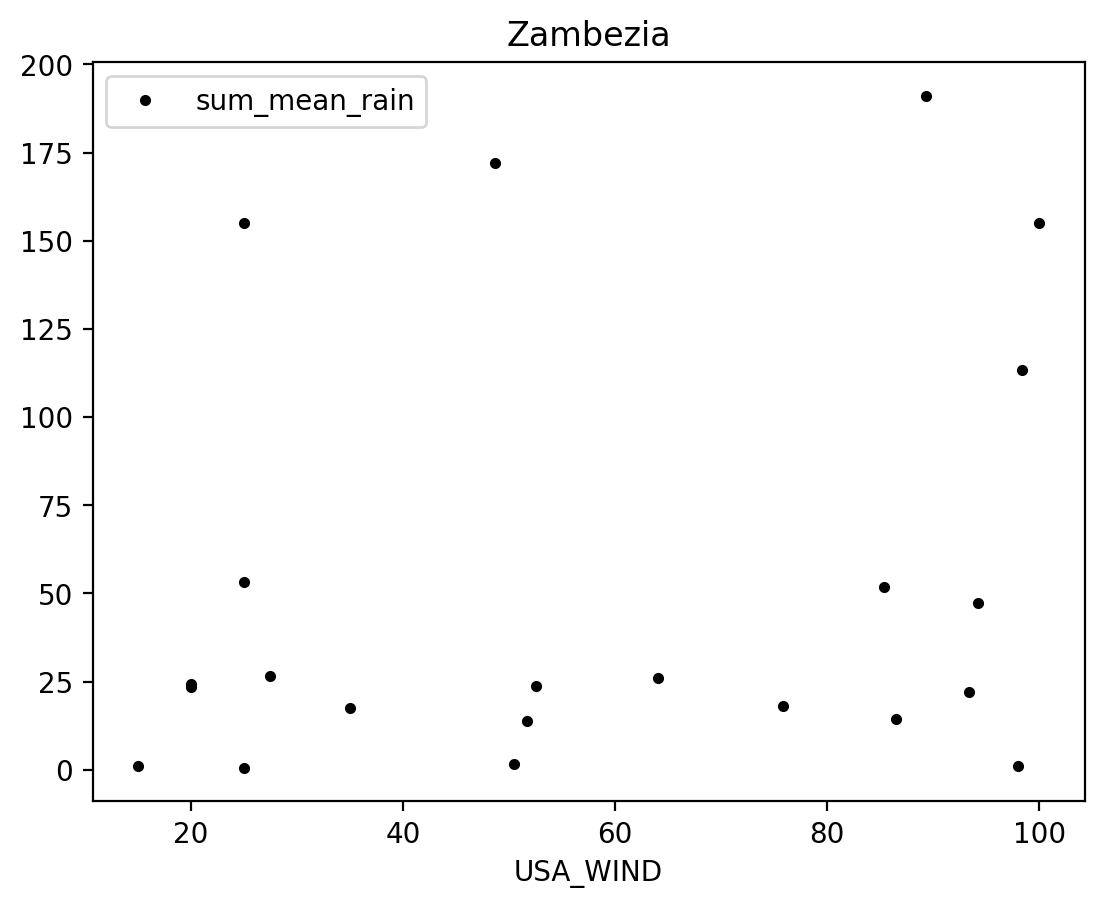

In [126]:
rp = 3

for pcode, group in combined_df.groupby("pcode"):
    fig, ax = plt.subplots(dpi=200)
    dff = group[group["SEASON"] < 2024]
    rv = dff["sum_mean_rain"].quantile(1 - 1 / rp)

    group.plot(
        x="USA_WIND",
        y="sum_mean_rain",
        ax=ax,
        linewidth=0,
        marker=".",
        color="k",
    )

    ax.set_title(group.iloc[0]["ADM1_PT"])
    print(group.iloc[0]["ADM1_PT"])